## Project Description: Fake Job Postings Detection

### Objective:
    The objective of this project is to create a machine learning model for identifying fake job postings. The model utilizes features such as job titles, locations, company profiles, and other relevant information to classify job listings as either fraudulent or legitimate.

### Dataset:
    The dataset, stored in a CSV file named 'fake_job_postings.csv', includes columns such as job_id, title, location, department, salary_range, and others. The target variable, 'fraudulent,' indicates whether a job posting is fraudulent (1) or not fraudulent (0).

In [22]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier

### Data Loading and Exploration: 
    I begin by loading the dataset, exploring its structure, and gaining insights into the distribution of fraudulent and non-fraudulent instances.

In [2]:
#Load dataset
file_path = 'C:\\Users\\Administrator\\Documents\\Data Science Projects\\fake_job_postings.csv'
df = pd.read_csv(file_path)

In [3]:
df.columns
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

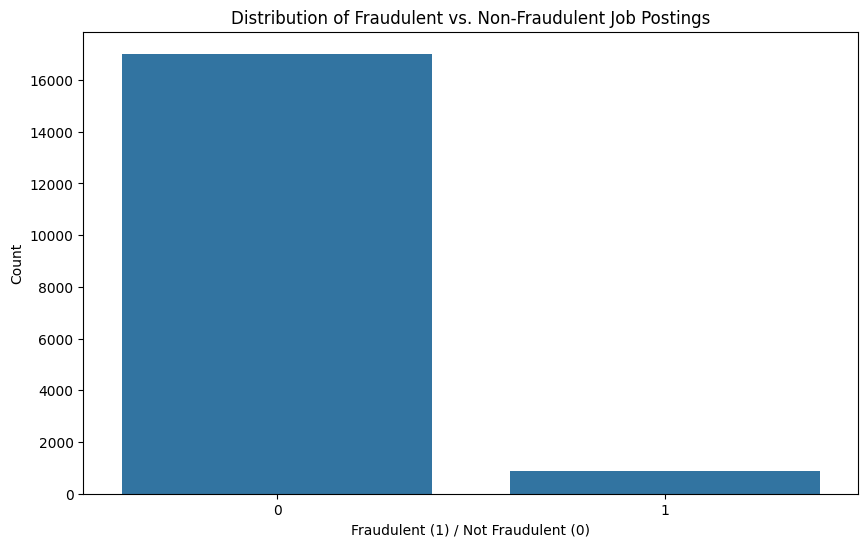

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Count')
plt.show()

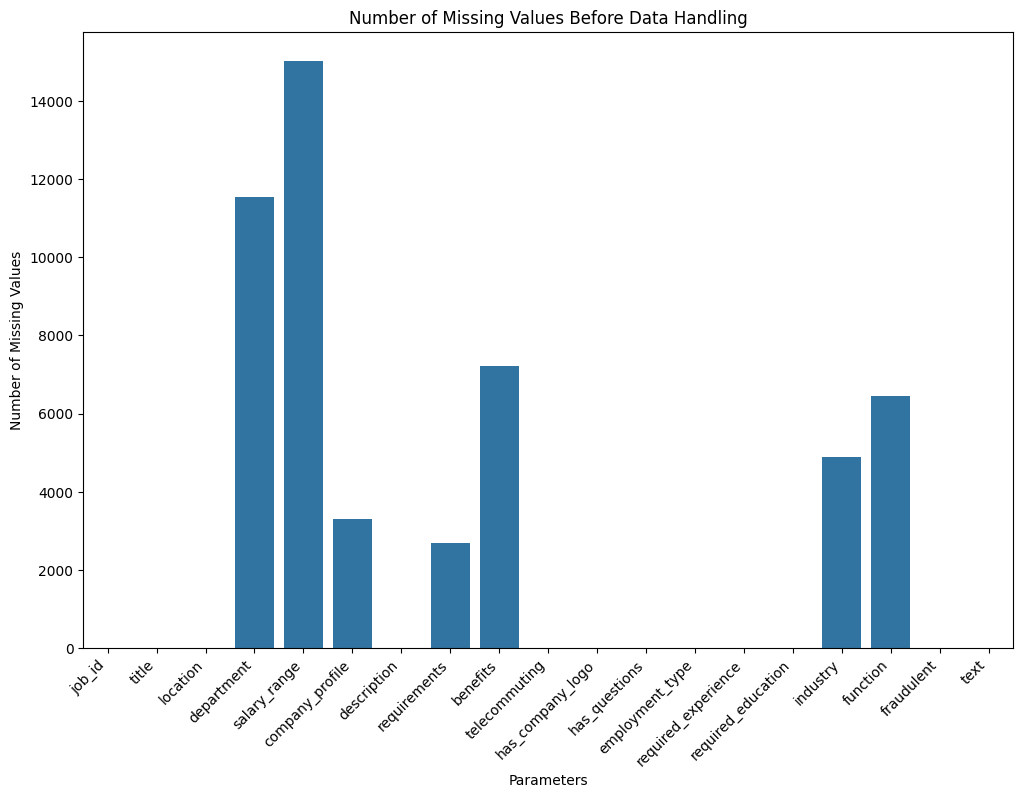

In [17]:
nan_count_before_handling = df.isnull().sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=nan_count_before_handling.index, y=nan_count_before_handling.values)
plt.title('Number of Missing Values Before Data Handling')
plt.xlabel('Parameters')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

### Data Preprocessing: 
    Address missing values in the dataset and handle categorical features using techniques like one-hot encoding, preparing the data for model training.

In [10]:
nan_count = df.isnull().sum()

# Display the number of nan values
print("Number of NaN values in each column:")
print(nan_count)

Number of NaN values in each column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [11]:
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
df['location'] = df['location'].fillna('')
df['employment_type'] = df['employment_type'].fillna('')
df['required_experience'] = df['required_experience'].fillna('')
df['required_education'] = df['required_education'].fillna('')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['text', 'location', 'employment_type', 'required_experience', 'required_education']],
    df['fraudulent'],
    test_size=0.2,
    random_state=0
)

### Model Development: 
    Choose a machine learning model, such as a Gradient Boosting Classifier, and train it using a pipeline that includes preprocessing steps and encoding of categorical features.

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), 'text'),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), ['location', 'employment_type', 'required_experience', 'required_education'])
    ])

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

In [29]:
# Gradient Boost

pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())  
    ])

In [25]:
# Random forest

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

In [26]:
# XGBoost

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=0))
])

In [23]:
# Neural Network (MLP)
pipeline_nn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=0))
])

In [31]:
# List of models for cross-validation
models = [
    ('Gradient Boosting', pipeline_gb),
    ('Random Forest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('Neural Network', pipeline_nn)
]

In [32]:
# Perform cross-validation and print results
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-Validation Results:')
    print(f'Mean Accuracy: {np.mean(cv_results)}')
    print(f'Standard Deviation: {np.std(cv_results)}\n')

Gradient Boosting Cross-Validation Results:
Mean Accuracy: 0.9723155383588798
Standard Deviation: 0.0019434535780450766

Random Forest Cross-Validation Results:
Mean Accuracy: 0.9763005746438115
Standard Deviation: 0.0019297172510780143

XGBoost Cross-Validation Results:
Mean Accuracy: 0.9788173727705359
Standard Deviation: 0.001969984829759262



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network Cross-Validation Results:
Mean Accuracy: 0.9779784074715916
Standard Deviation: 0.002129888213500891



In [33]:
# Removed neural networks due to limited processing power
pipeline_gb.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'text'),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'employment_type',
                                                   'required_experience',
                                                   'required_education'])])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [34]:
y_pred_gb = pipeline_gb.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [36]:
#Compare metrics
print('\nResults - Gradient Boosting Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_gb)}')

print('\nResults - Random Forest Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')

print('\nResults - XGBoost Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_xgb)}')


Results - Gradient Boosting Classifier:
Accuracy: 0.9781879194630873
F1 Score: 0.6666666666666666

Results - Random Forest Classifier:
Accuracy: 0.9821029082774049
F1 Score: 0.7377049180327868

Results - XGBoost Classifier:
Accuracy: 0.9846196868008948
F1 Score: 0.7908745247148289


### Based on the results from both Accuracy and F1 score, XGBoost Classifier is the best performer.

In [41]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

In [38]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

In [39]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [42]:
print('\nXGBoost Classifier (Best Performer) Test Set Results:')
print(f'Accuracy: {accuracy_xgb}')
print('\nConfusion Matrix:')
print(conf_matrix_xgb)
print('\nClassification Report:')
print(classification_rep_xgb)


XGBoost Classifier (Best Performer) Test Set Results:
Accuracy: 0.9846196868008948

Confusion Matrix:
[[3417    6]
 [  49  104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3423
           1       0.95      0.68      0.79       153

    accuracy                           0.98      3576
   macro avg       0.97      0.84      0.89      3576
weighted avg       0.98      0.98      0.98      3576



In [43]:
print('\nRandom Forest Classifier Test Set Results:')
print(f'Accuracy: {accuracy_rf}')
print('\nConfusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(classification_rep_rf)


Random Forest Classifier Test Set Results:
Accuracy: 0.9821029082774049

Confusion Matrix:
[[3422    1]
 [  63   90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       0.99      0.59      0.74       153

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576



In [44]:
print('\nGradient Boosting Classifier Test Set Results:')
print(f'Accuracy: {accuracy_gb}')
print('\nConfusion Matrix:')
print(conf_matrix_gb)
print('\nClassification Report:')
print(classification_rep_gb)


Gradient Boosting Classifier Test Set Results:
Accuracy: 0.9781879194630873

Confusion Matrix:
[[3420    3]
 [  75   78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       0.96      0.51      0.67       153

    accuracy                           0.98      3576
   macro avg       0.97      0.75      0.83      3576
weighted avg       0.98      0.98      0.97      3576



### Visualization: 
Visualize confusion matrices and classification reports to gain insights into the model's behavior at different threshold levels. (XGBoost Classifier)

In [45]:
def plot_confusion_matrix(y_true, y_pred_xgb):
    cm = confusion_matrix(y_true, y_pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraudulent', 'Fraudulent'],
                yticklabels=['Not Fraudulent', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [46]:
def plot_classification_report(y_true, y_pred_xgb):
    report = classification_report(y_true, y_pred_xgb, output_dict=True)
    accuracy = report['accuracy']
    del report['accuracy']  # Remove accuracy from the dictionary to plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(report).T, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Classification Report\nAccuracy: {accuracy:.2f}')
    plt.show()

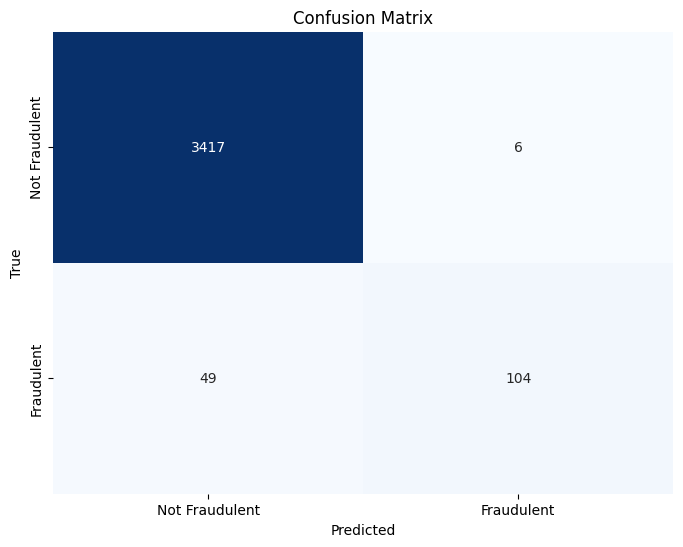

In [47]:
plot_confusion_matrix(y_test, y_pred_xgb)

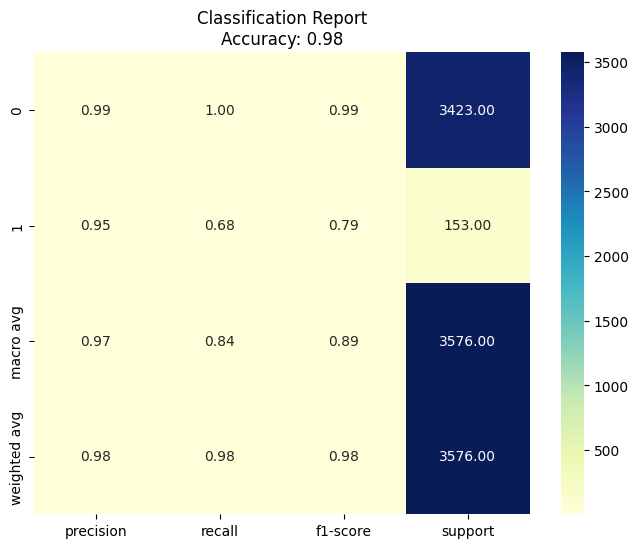

In [48]:
plot_classification_report(y_test, y_pred_xgb)

In [54]:
class_distribution = df['fraudulent'].value_counts()
imbalance_ratio = class_distribution[1] / class_distribution[0]
print(f'Imbalance Ratio: {imbalance_ratio:.4f}')

# The imbalance ratio we get makes sense as the the original dataset contains 18K job descriptions out of which about 800 are fake

Imbalance Ratio: 0.0509


In [51]:
# Function to evaluate the model with different thresholds
def evaluate_with_threshold(model, X_test, y_test, threshold):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred_threshold = np.where(y_proba >= threshold, 1, 0)
    # Add additional evaluation metrics if needed
    return confusion_matrix(y_test, y_pred_threshold)

# Example usage
threshold_values = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in threshold_values:
    confusion_matrix_result = evaluate_with_threshold(pipeline_xgb, X_test, y_test, threshold)
    print(f"Threshold {threshold}:")
    print(confusion_matrix_result)

Threshold 0.3:
[[3404   19]
 [  42  111]]
Threshold 0.4:
[[3411   12]
 [  45  108]]
Threshold 0.5:
[[3417    6]
 [  49  104]]
Threshold 0.6:
[[3420    3]
 [  53  100]]
Threshold 0.7:
[[3421    2]
 [  57   96]]


In [52]:
fraudulent_count = sum(y_pred_xgb == 1)
not_fraudulent_count = sum(y_pred_xgb == 0)

print(f"Number of instances predicted as fraudulent: {fraudulent_count}")
print(f"Number of instances predicted as not fraudulent: {not_fraudulent_count}")

Number of instances predicted as fraudulent: 110
Number of instances predicted as not fraudulent: 3466


In [53]:
fraudulent_count = df['fraudulent'].sum()
non_fraudulent_count = len(df) - fraudulent_count

# Display the counts
print("Number of Fraudulent instances:", fraudulent_count)
print("Number of Non-Fraudulent instances:", non_fraudulent_count)

Number of Fraudulent instances: 866
Number of Non-Fraudulent instances: 17014
